# Project : Case Study (Part - I) 

### Dataset details:

'''

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

SNo - Serial number.

Date - Date of funding in format DD/MM/YYYY.

StartupName - Name of the startup which got funded.

IndustryVertical - Industry to which the startup belongs.

SubVertical - Sub-category of the industry type.

CityLocation - City which the startup is based out of.

InvestorsName - Name of the investors involved in the funding round.

InvestmentType - Either Private Equity or Seed Funding.

AmountInUSD - Funding Amount in USD.

Remarks - Other information, if any.

Insights -

Find out what type of startups are getting funded in the last few years?

Who are the important investors?

What are the hot fields that get a lot of funding these days?

'''

In [1]:
path = '14startup_funding.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(path)
df = data.copy()
colours = ['green', 'blue', 'orange', 'purple', 'magenta', 'red', 'yellow', 'cyan', 'chocolate', 'skyblue']

In [2]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [3]:
df.shape

(2372, 10)

In [4]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


## 1) Number of Fundings: Check the trend of investments over the years

In [5]:
import csv
path = '14startup_funding.csv'
with open(path) as file_obj:
    file_dict = csv.DictReader(file_obj, skipinitialspace=True)
    yearWiseInv = {}
    for row in file_dict:
        date = row['Date'].strip()
        if date[6] == '/' or date[6]=='.':
            year = float(date[7:])
        elif date[4] == '/' or date[4]=='.':
            year = float(date[5:])
        else:
            year = float(date[6:])


        if year in yearWiseInv:
            yearWiseInv[year] += 1
        else:
            yearWiseInv[year] = 1
yearWiseInv

{2017.0: 443, 2016.0: 993, 2015.0: 936}

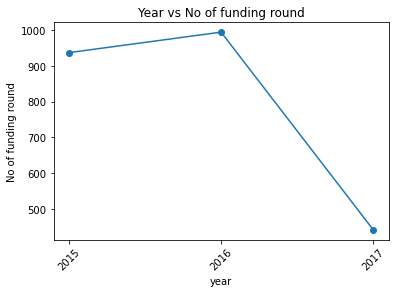

2015 936
2016 993
2017 443


In [6]:
import numpy as np
year = np.array(list(yearWiseInv.keys()), dtype=int)
year[0],year[2] = year[2],year[0]
fund = np.array(list(yearWiseInv.values()), dtype=int)
fund[0],fund[2] = fund[2],fund[0]

import matplotlib.pyplot as plt
plt.plot(year, fund, marker= 'o')
plt.xticks(year)
plt.xlabel("year")
plt.ylabel("No of funding round")
plt.title("Year vs No of funding round")
plt.xticks(rotation=45)
plt.show()
for i in range(3):
    print(year[i], fund[i])

## 2) Top Indian Cities: Find top 10 Indian cities which have most number of startups ?

In [7]:
df = data.copy()
df.dropna(subset = ["CityLocation"], inplace = True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
city = df['CityLocation'].value_counts()[:10]

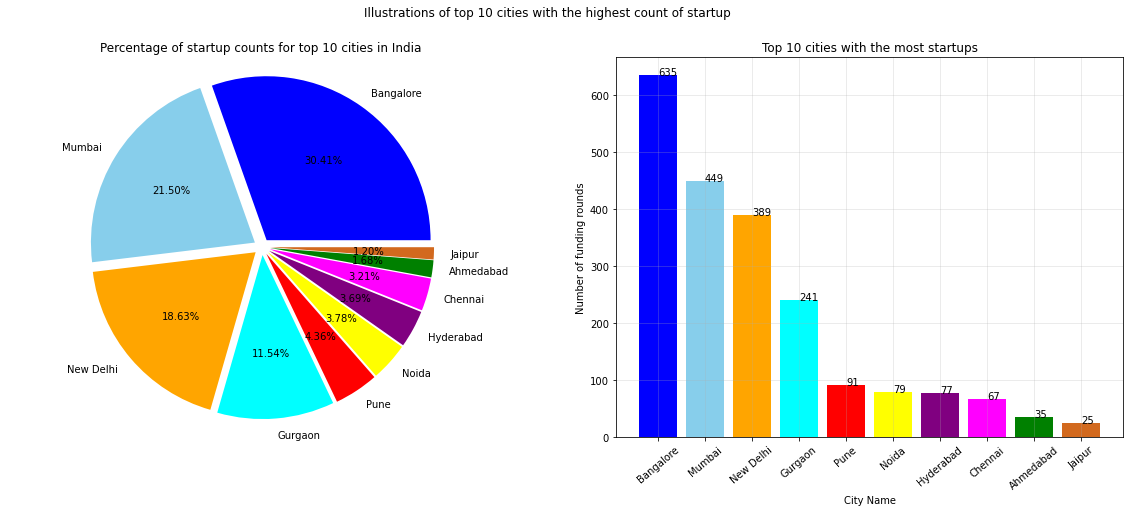

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Noida',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Jaipur'],
      dtype='object')

In [8]:
import random
currentColors = random.sample(colours, 10)

number = city.values
city = city.index
labels = []

plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
plt.pie(number, labels = city, autopct = '%.2f%%', explode = [0.05 for _ in range(10)], colors = currentColors)
plt.title('Percentage of startup counts for top 10 cities in India')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.grid(alpha = 0.3)
for _city, _startupCount, colour in zip(city, number, currentColors) :
    plt.bar(_city, _startupCount, color = colour)
    plt.text(_city, _startupCount, str(_startupCount))
plt.title('Top 10 cities with the most startups')
plt.ylabel('Number of funding rounds')
plt.xlabel('City Name')
plt.xticks(rotation = 40)

plt.suptitle('Illustrations of top 10 cities with the highest count of startup')
plt.show()
city

#### 3) Funding amount: Top 10 cities with the most amount of funding

In [9]:
df = data.copy()
df.dropna(subset = ["CityLocation", "AmountInUSD"], inplace = True)
print(df.CityLocation.isna().sum())
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df["AmountInUSD"] = df["AmountInUSD"].apply( lambda  x : float(str(x).replace("," , "")))
df["AmountInUSD"][0:3]

0


0    1300000.0
3     500000.0
4     850000.0
Name: AmountInUSD, dtype: float64

In [10]:
citywise_Inv = df.groupby("CityLocation")["AmountInUSD"].sum().sort_values(ascending = False)[:10]
print(citywise_Inv[0:3])
print('-'*70)

city = citywise_Inv.index
amount = citywise_Inv.values
amount_percent = np.true_divide(amount, amount.sum())*100
amount_percent = [ round(amount, 2) for amount in  amount_percent ]
for i in range(3):
    print(city[i], amount_percent[i])

CityLocation
Bangalore    8.422974e+09
New Delhi    2.818248e+09
Mumbai       2.354934e+09
Name: AmountInUSD, dtype: float64
----------------------------------------------------------------------
Bangalore 49.71
New Delhi 16.63
Mumbai 13.9


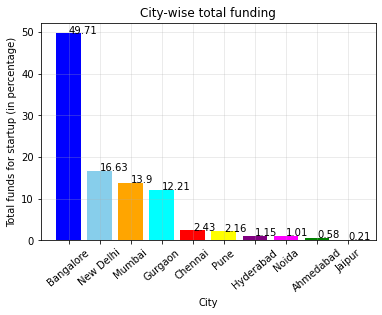

In [11]:
for _city, amount, colour in zip(city, amount_percent, currentColors) :
    plt.bar(_city, amount, color = colour)
    plt.text(_city, amount, str(amount))
plt.xlabel('City')
plt.ylabel('Total funds for startup (in percentage)')
plt.xticks(rotation = 40)
plt.title('City-wise total funding')
plt.grid(alpha = 0.3)
plt.show()

### 4) Investment Type: Percentage Distribution of 4 major funding types

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

In [12]:
df = data.copy()
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [13]:
df.dropna(subset = ['InvestmentType'], inplace = True)

In [14]:
df['InvestmentType'].replace("SeedFunding", "Seed Funding", inplace = True)
df['InvestmentType'].replace("PrivateEquity", "Private Equity", inplace = True)
df['InvestmentType'].replace("Crowd funding", "Crowd Funding", inplace = True)
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding'],
      dtype=object)

In [15]:
df['AmountInUSD'] = df['AmountInUSD'].apply( lambda x : float(str(x).replace(",", "")) ) 
amount_investmentType = df.groupby('InvestmentType')['AmountInUSD'].sum()
amount_investmentType = amount_investmentType.sort_values(ascending = False)
investmentType = amount_investmentType.index
amount = amount_investmentType.values
amount_percent = np.true_divide(amount, amount.sum())*100
for i in range(len(amount)):
    print(investmentType[i], f"{ amount_percent[i] : 0.2f}")

Private Equity  98.15
Seed Funding  1.81
Debt Funding  0.04
Crowd Funding  0.00


#### 5) Top Industries: Top 5 industries that recieves most funds

In [16]:
df = data.copy()
df.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [17]:
df['IndustryVertical'].replace("eCommerce", "Ecommerce", inplace = True)
df['IndustryVertical'].replace("ECommerce", "Ecommerce", inplace = True)
df['IndustryVertical'].replace("ecommerce", "Ecommerce", inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : float(str(x).replace(",", "")))
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

industryWise_funding = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[:5]
industry = industryWise_funding.index
fund = industryWise_funding.values

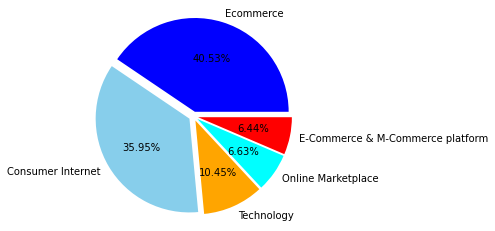

In [18]:
plt.pie(fund, labels = industry, autopct = "%0.2f%%", explode = [0.05 for _ in range(5)], colors = currentColors)
plt.axis("equal")
plt.show()

#### 6) Top startups : Top 5 startups to have the most amount of funding

In [19]:
df_start = data.copy()
df_start['StartupName'].replace('Olacabs','Ola',inplace=True)
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x:float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])
start_fund=df_start.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startup=start_fund.index
funding = start_fund.values
for i in range(5):
    print(startup[i], funding[i])

Paytm 2340000000.0
Flipkart 2259700000.0
Ola 1899500000.0
Snapdeal 700000000.0
Oyo 637000000.0


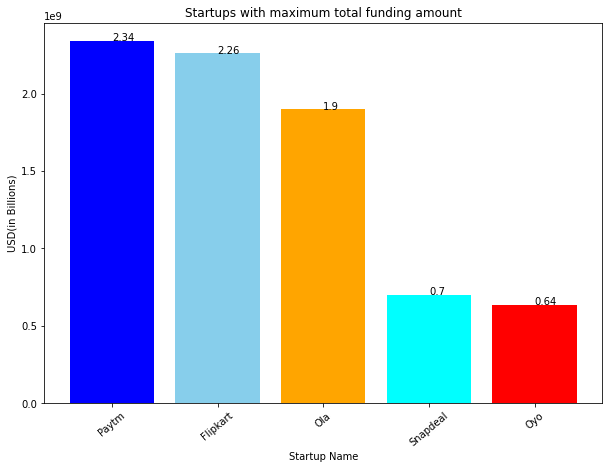

In [20]:
plt.figure(figsize = (10, 7))
for _startup, _totalAmount, colour in zip(startup, funding, currentColors) :
    plt.bar(_startup, _totalAmount, color = colour)
    plt.text(_startup, _totalAmount, str(round(_totalAmount / (10 ** 9), 2)))

plt.title('Startups with maximum total funding amount')
plt.xlabel('Startup Name')
plt.ylabel('USD(in Billions)')
plt.xticks(rotation = 40)
plt.show()

#### 7) Funding rounds : Top 10 startups which had the most funding rounds 

In [21]:
df = data.copy()

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:10]
startupname = totalfunding.index
count = totalfunding.values
totalfunding

Ola          9
Swiggy       7
UrbanClap    6
Paytm        6
Oyo          6
Medinfi      5
Jugnoo       5
NoBroker     5
Flipkart     5
Niki.ai      4
Name: StartupName, dtype: int64

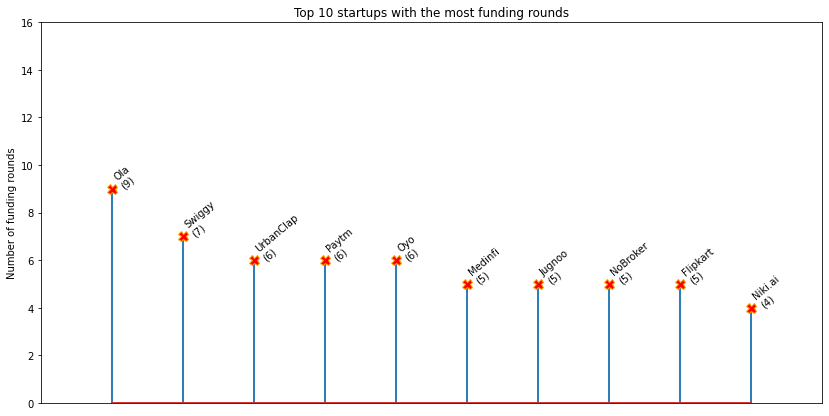

In [22]:
plt.figure(figsize = (14, 7))
plt.stem(count, markerfmt = ' ')

(markers, stemlines, baseline) = plt.stem(count)
plt.setp(markers, marker = 'X', markersize = 10, markeredgecolor = "orange", markeredgewidth = 1, color = 'red')
index = 0
for _startup, _round, colour in zip(startupname, count, currentColors) :
    plt.text(index, _round, str(_startup) + '\n(' + str(_round) + ")", rotation = 40)
    index += 1

plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.ylabel('Number of funding rounds')
plt.title('Top 10 startups with the most funding rounds')
plt.ylim(0, 16)
plt.xlim(-1, 10)
plt.show()

#### 8) Top Investor : Top 5 Investors who have invested for maximum number of times 

In [23]:
df = data.copy()
df.dropna(subset = ['InvestorsName'], inplace = True)

def createDict(arr):
    d = {}
    for i in arr:
        if ',' not in i:
            d[i] = d.get(i,0)+1
        else:
            name = i.strip().split(",")
            for j in name:
                d[j.strip()] = d.get(j.strip(), 0) +1
    return d

dict = createDict(df['InvestorsName'])
df_new = pd.DataFrame(list(dict.values()), list(dict.keys()))
df_new = df_new.sort_values(by = [0], ascending = False)[:5] 
df_new.head(2)

,0
Sequoia Capital,64
Accel Partners,53


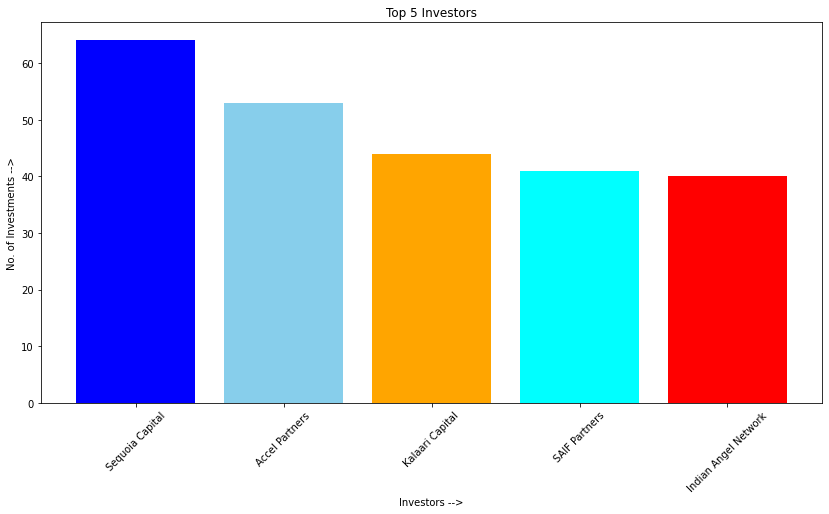

In [24]:
investor = df_new.index
no_of_funding = df_new.values.reshape(5)

plt.figure(figsize = (14, 7))
plt.bar(investor,no_of_funding, color = currentColors)
plt.title("Top 5 Investors")
plt.xlabel("Investors -->")
plt.ylabel("No. of Investments -->")
plt.xticks(rotation=45)
plt.show()        